<a href="https://colab.research.google.com/github/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/blob/main/DA310_Multiple_Linear_Regression_Group_Project_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Plan**

Load data

Split dataset into training and test dataset, use training dataset to create the model.

Display sample data and summary


Calculate normality p-value

Calculate lineral regression model and display values

Display regression summary

Display scatterplot again with calculated regression line

Compare actual and predicted values to determine accuracy of the linear regression equation

Observe residuals data in graphical form to draw conclusions


Normality in Mulitiple Linear Regression
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/normality/


In [2]:
#Read this csv file from GitHub into Jupyter Notebook.
dataset = pd.read_csv(r"https://raw.githubusercontent.com/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/main/insurance.csv")

In [3]:
#Mask category values to numeric/binary
dataset['sex'].mask(dataset['sex'] == 'female', 0, inplace=True)
dataset['sex'].mask(dataset['sex'] == 'male', 1, inplace=True)

dataset['smoker'].mask(dataset['smoker'] == 'no', 0, inplace=True)
dataset['smoker'].mask(dataset['smoker'] == 'yes', 1, inplace=True)

dataset['region'].mask(dataset['region'] == 'northeast', 0, inplace=True)
dataset['region'].mask(dataset['region'] == 'southeast', 1, inplace=True)
dataset['region'].mask(dataset['region'] == 'northwest', 2, inplace=True)
dataset['region'].mask(dataset['region'] == 'southwest', 3, inplace=True)

In [4]:
#Make a copy and populate with training data
datasettraining = dataset.copy()
datasettest = dataset.copy()

#Take a random sample of 75% of the data for training (and put them into order and renumber to eliminate missing index values)
datasettraining = datasettraining.sample(frac = .75).sort_index().reset_index(drop=True)

#Get remaining 25% of data rows from dataset (remove all rows from dataset that aren't already in datasettraining)
datasettest = (pd.merge(dataset, datasettraining, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)).sort_index().reset_index(drop=True)

In [5]:
#Check training data head
datasettraining.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [6]:
#Summary of all fields
datasettraining.describe()

,age,bmi,children,charges
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,39.468127,30.666544,1.121514,13346.145124
std,14.063309,6.004861,1.206155,12108.193422
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.308750,0.000000,4844.585687
50%,40.000000,30.400000,1.000000,9523.002925
75%,52.000000,34.700000,2.000000,16604.302645
max,64.000000,50.380000,5.000000,63770.428010


In [7]:
#Summary of all fields
datasettest.describe()

,age,bmi,children,charges
count,333.000000,333.000000,333.000000,333.000000
mean,38.480480,30.654129,1.018018,13077.044213
std,13.981822,6.389380,1.202272,12132.869110
min,18.000000,17.290000,0.000000,1136.399400
25%,25.000000,26.220000,0.000000,4320.410850
50%,38.000000,30.300000,1.000000,8965.795750
75%,50.000000,34.600000,2.000000,16776.304050
max,64.000000,53.130000,5.000000,62592.873090


In [8]:
#Set Variable Choices
MultiVarChoices = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

#Create Linear Regression object
model = LinearRegression()

#Fit the dataset
model.fit(datasettraining[MultiVarChoices], datasettraining['charges'])


LinearRegression()

In [9]:
#Gernate list of predictions from test data
predictions = model.predict(datasettest[MultiVarChoices])  

#Check test data head
datasettest.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,1,24.600,1,0,3,1837.23700
1,18,1,34.100,0,0,1,1137.01100
2,34,0,31.920,1,1,0,37701.87680
3,63,0,23.085,0,0,0,14451.83515
4,38,1,37.050,1,0,0,6079.67150


In [10]:
#Sample data output
print('Actual'.ljust(14), 'Predicted'.ljust(14))
print('Charges'.ljust(14), 'Charges'.ljust(14))

for i in [0,1,2,3,4,95,96,97,98,99]:
    print("${:,.2f}".format(datasettest['charges'][i]).ljust(14), "${:,.2f}".format(predictions[i]).ljust(14))

Actual         Predicted     
Charges        Charges       
$1,837.24      $989.16       
$1,137.01      $3,517.38     
$37,701.88     $31,680.86    
$14,451.84     $12,335.15    
$6,079.67      $10,379.10    
$11,396.90     $14,968.00    
$6,652.53      $6,231.23     
$4,074.45      $6,460.21     
$19,594.81     $30,778.52    
$9,140.95      $12,603.24    


In [11]:
#Check accuracy of model (Coefficient of Determination)
r_sq = model.score(datasettraining[MultiVarChoices], datasettraining['charges'])
print('Coefficient of Determination:', r_sq)

Coefficient of Determination: 0.747005420884489


In [12]:
#Get the Y-intercept value
salIntercept = model.intercept_

#Get the Coefficents for the formula.
salCoef = model.coef_

#Output formula variables for regression analysis.
print('Intercept:', salIntercept,'\n')

print("Coefficients:")
list(zip(datasettraining[MultiVarChoices], salCoef))

Intercept: -11562.548579254933 

Coefficients:


[('age', 267.23125522198427),
 ('sex', 5.889821949900295),
 ('bmi', 305.91868407940973),
 ('children', 446.6836332626978),
 ('smoker', 23945.941775037933),
 ('region', -167.95252731036334)]

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     368.3
Date:                Thu, 16 Jun 2022   Prob (F-statistic):          3.37e-291
Time:                        21:17:17   Log-Likelihood:                -10172.
No. Observations:                1004   AIC:                         2.036e+04
Df Residuals:                     995   BIC:                         2.041e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.175e+04   1146.001    -10.257      

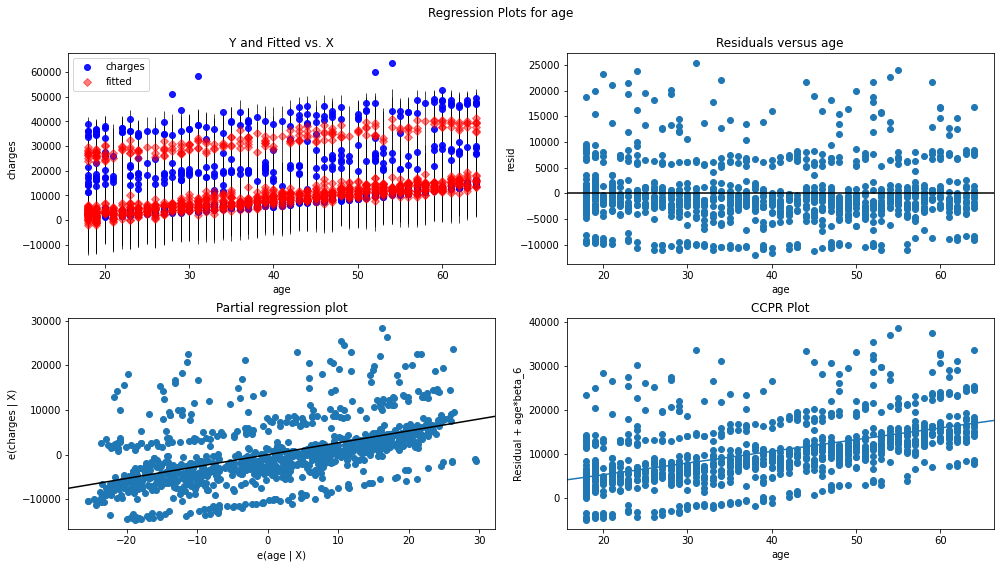

In [13]:
#age

# fit multi linear regression model
multi_model = ols('charges ~ age + sex + bmi + children + smoker + region', data=datasettraining).fit()

# display model summary
print(multi_model.summary())

# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(multi_model, 'age', fig=fig)

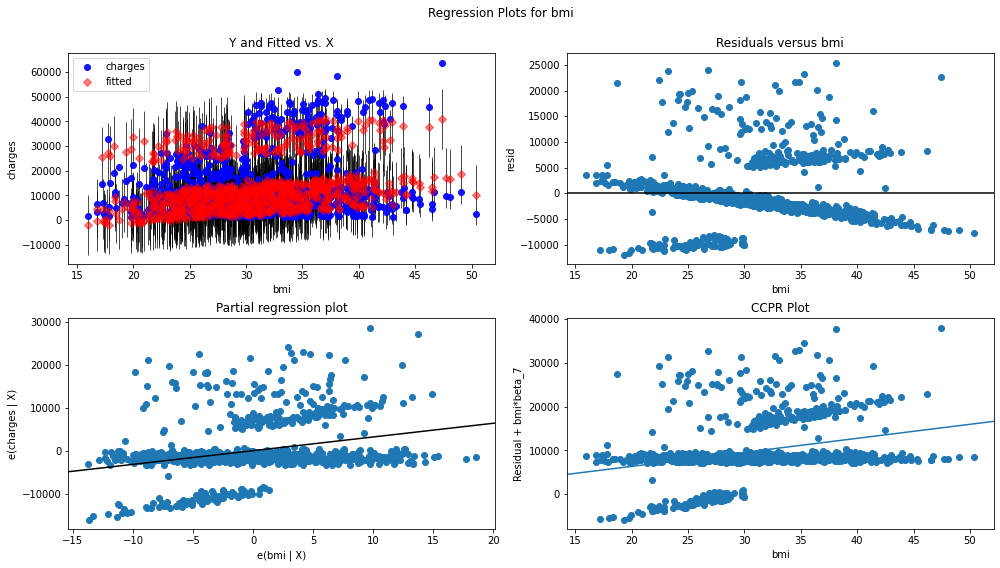

In [14]:
# BMI

# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(multi_model, 'bmi', fig=fig)